Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [26]:
df_wine = pd.read_csv('WineQT.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [27]:
df_wine = df_wine.drop('Id', axis=1)

print(df_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [28]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [29]:

df_wine.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.31,1.75,4.60,7.10,7.90,9.10,15.90
volatile acidity,1143.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1143.0,0.27,0.20,0.00,0.09,0.25,0.42,1.00
residual sugar,1143.0,2.53,1.36,0.90,1.90,2.20,2.60,15.50
chlorides,1143.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1143.0,15.62,10.25,1.00,7.00,13.00,21.00,68.00
total sulfur dioxide,1143.0,45.91,32.78,6.00,21.00,37.00,61.00,289.00
density,1143.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1143.0,3.31,0.16,2.74,3.20,3.31,3.40,4.01
sulphates,1143.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


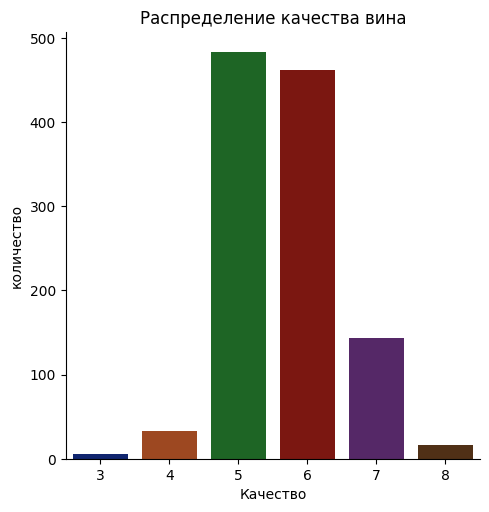

In [30]:
sns.catplot(data=df_wine, x='quality', kind='count')

plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('количество')

plt.show()

большинство вин имеет средний уровень качества

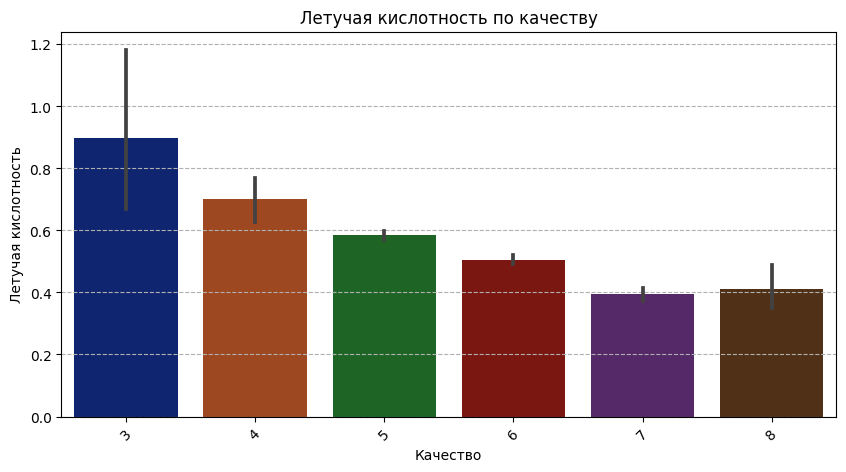

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='quality', y='volatile acidity', data=df_wine, ax=ax)

ax.set_title('Летучая кислотность по качеству')
ax.set_xlabel('Качество')
ax.set_ylabel('Летучая кислотность')

ax.grid(True, axis='y', linestyle='--')
sns.set_palette('dark')  
plt.xticks(rotation=45)  

# Display the plo
plt.show()

Летучая кислотность, судя по барплоту, имеет тенденцию изменяться в зависимости от качества вина. Можно предположить, что вина с более высоким качеством могут иметь оптимальный уровень летучей кислотности, который положительно влияет на их вкус и аромат.

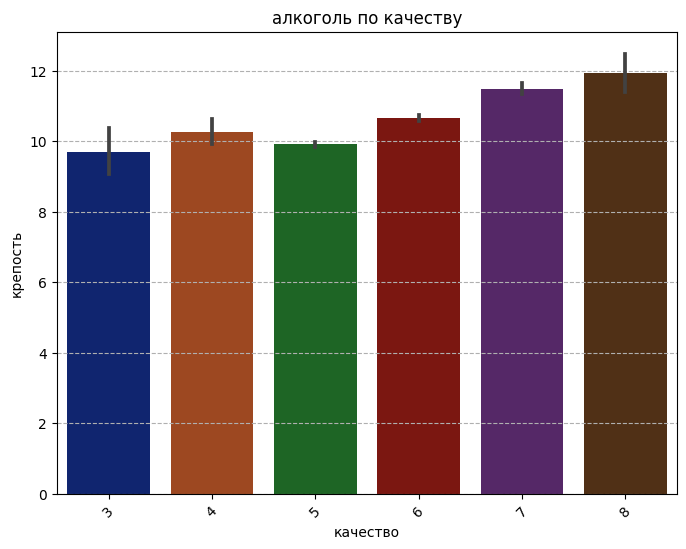

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='quality', y='alcohol', data=df_wine, ax=ax)

# Set plot title and axis labels
ax.set_title('алкоголь по качеству')
ax.set_xlabel('качество')
ax.set_ylabel('крепость')

ax.grid(True, axis='y', linestyle='--')
sns.set_palette('dark')  # Change color palette
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()

Барплот показывает, что содержание алкоголя также связано с качеством вина. Вина с более высоким качеством, возможно, имеют более сбалансированное содержание алкоголя, что может улучшать их вкусовые качества и восприятие.

In [33]:
null_counts = df_wine.isnull().sum() 

print(null_counts)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


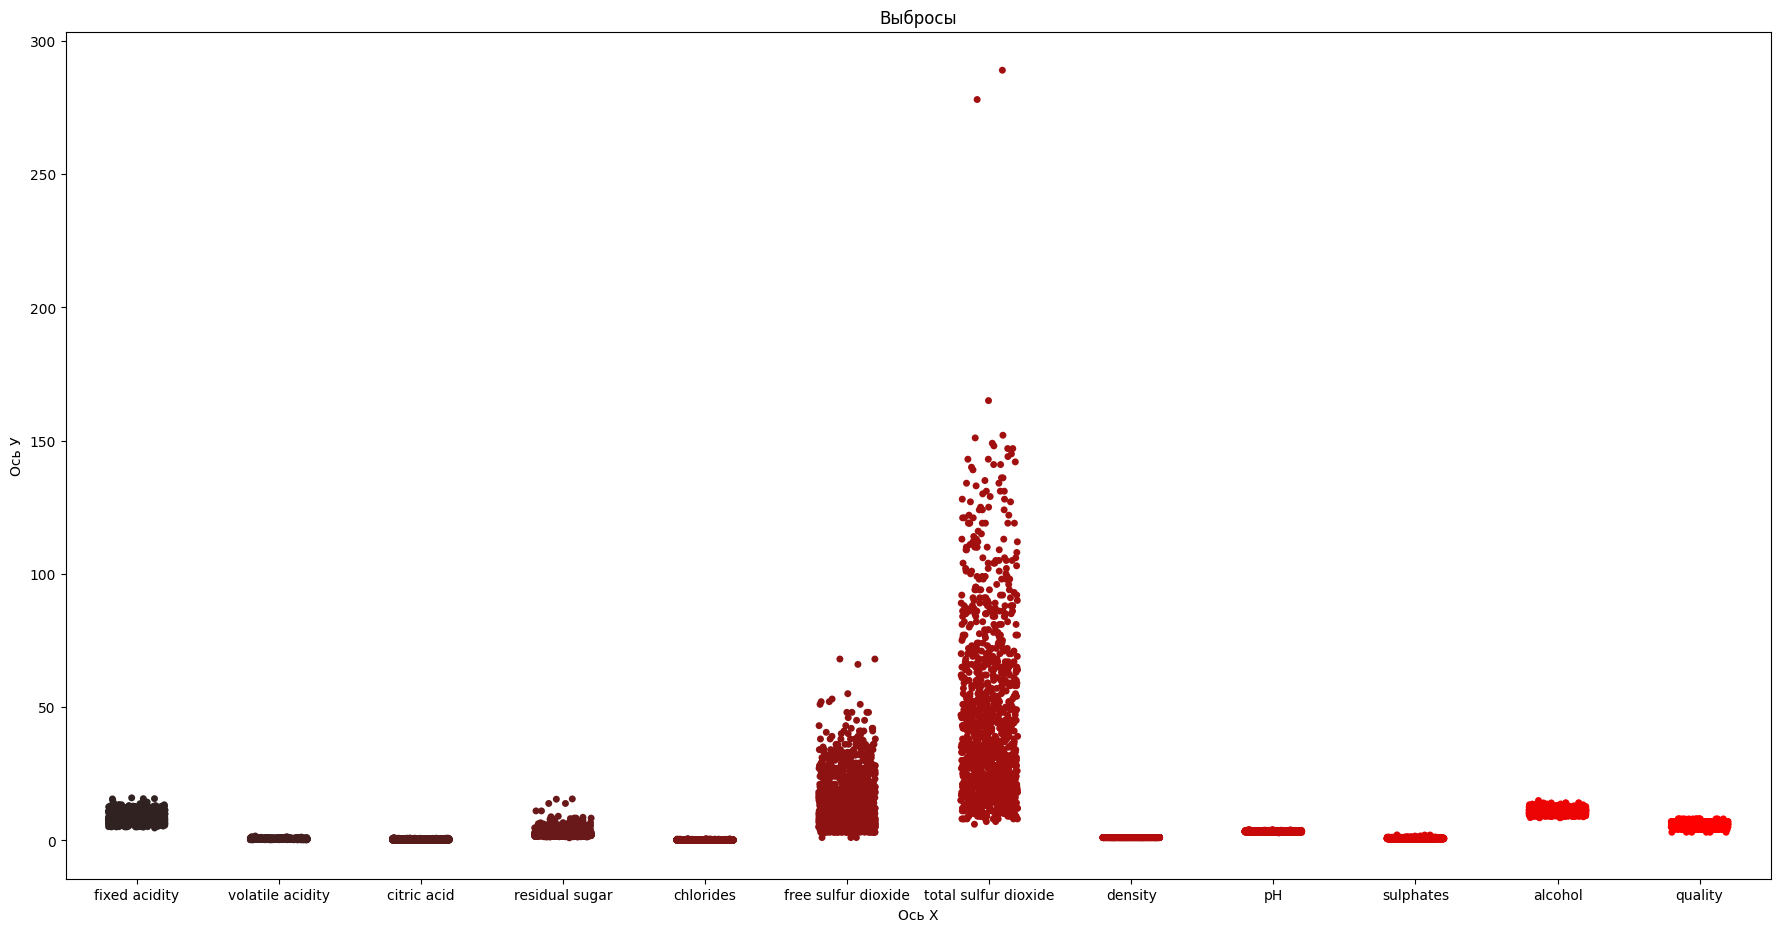

In [34]:
plt.figure(figsize=(22, 11))

sns.stripplot(data=df_wine, color="red", jitter=0.2, size=5)

plt.title("Выбросы")
plt.xlabel("Ось Х")
plt.ylabel("Ось У")

plt.show()

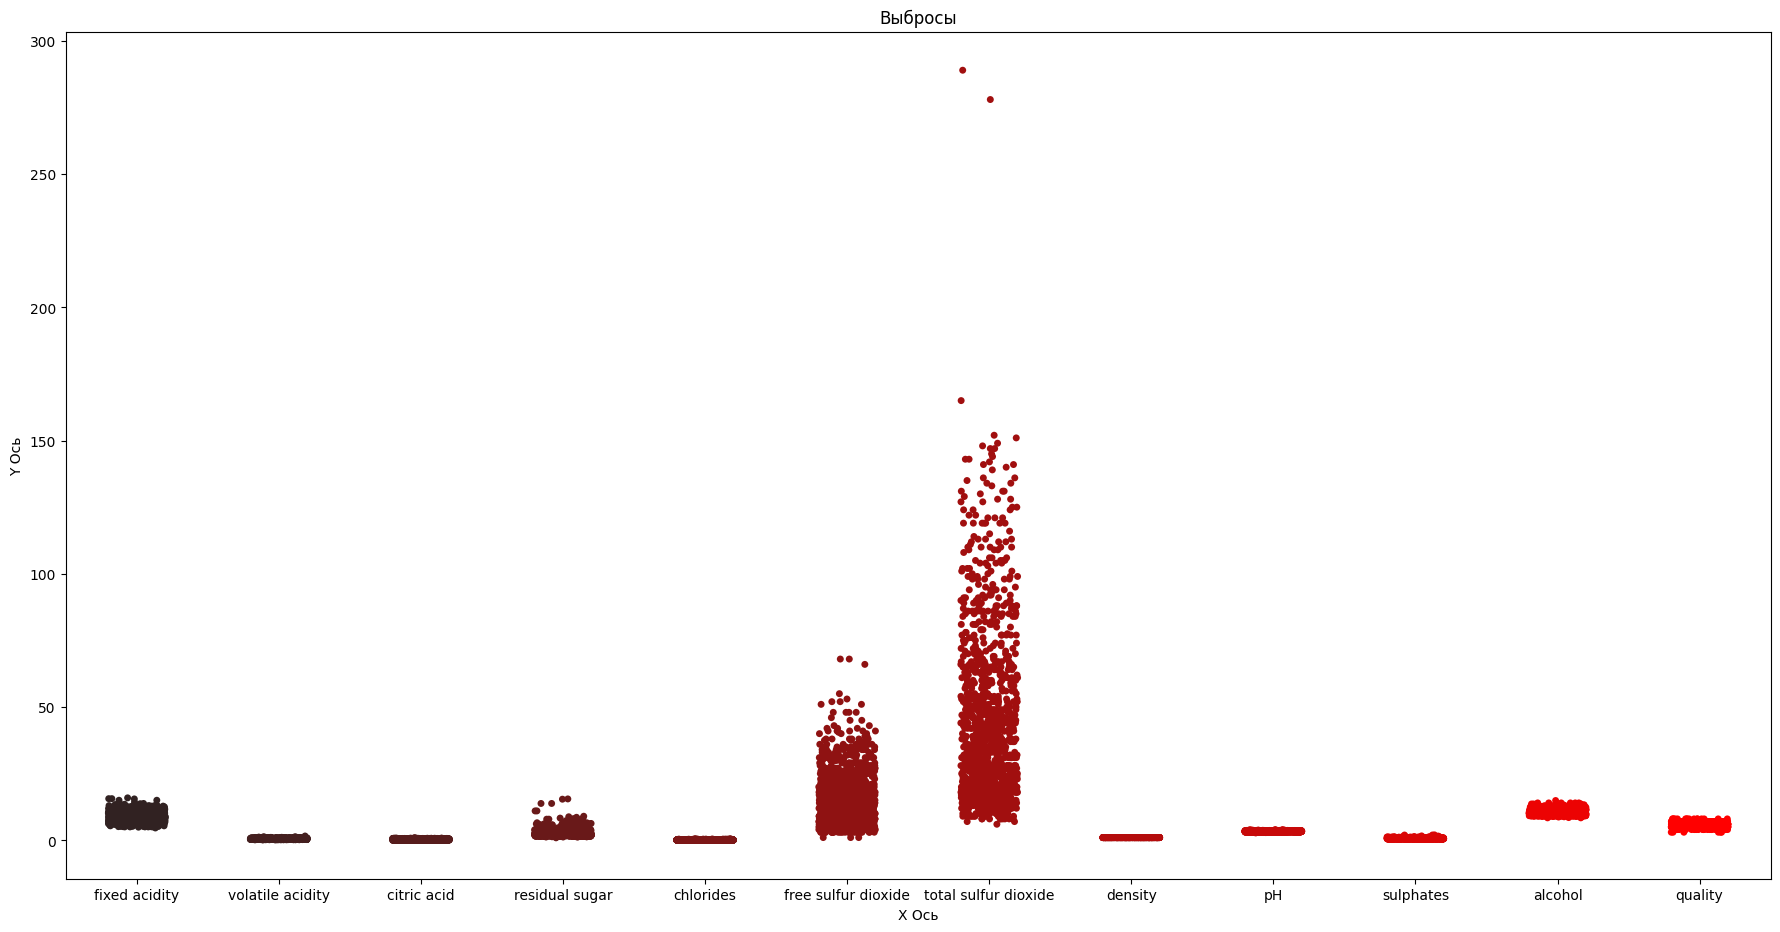

In [35]:
plt.figure(figsize=(22, 11))

sns.stripplot(data=df_wine, color="red", jitter=0.2, size=5)

plt.title("Выбросы")
plt.xlabel("X Ось")
plt.ylabel("Y Ось")

# Show the plot
plt.show()

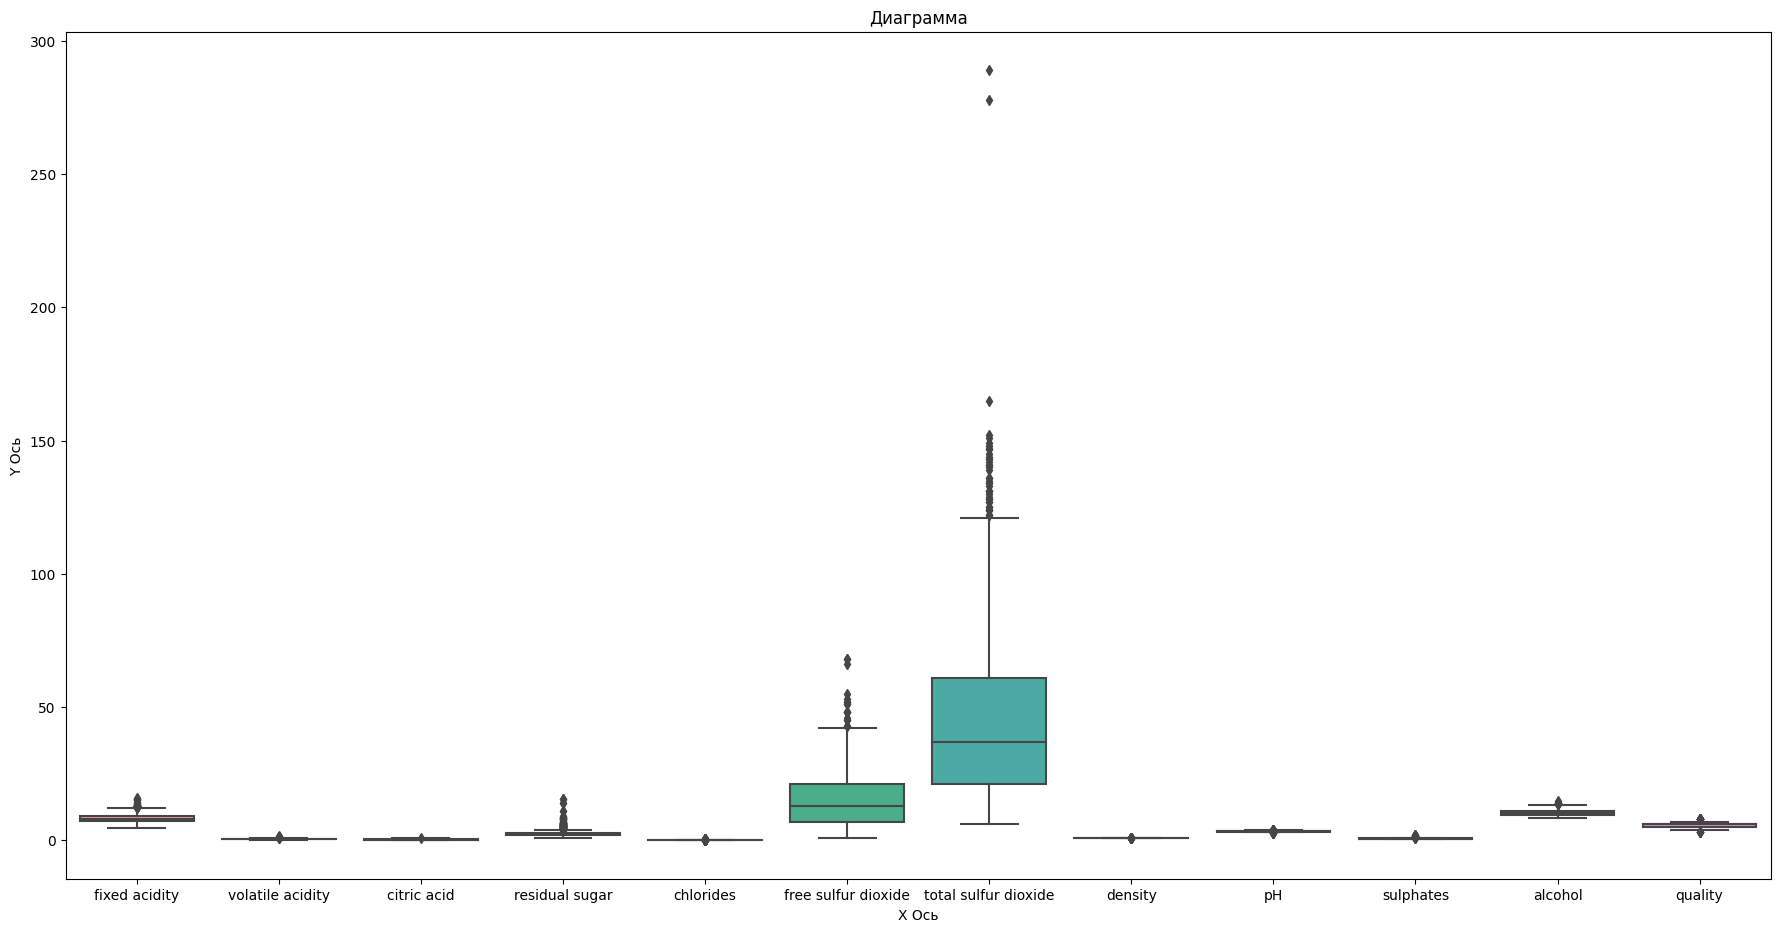

In [36]:
plt.figure(figsize=(22, 11))

sns.boxplot(data=df_wine)

plt.xlabel("X Ось")
plt.ylabel("Y Ось")
plt.title("Диаграмма")

plt.show()

Графики выбросов и диаграммы размаха показывают наличие аномальных значений, которые сильно отличаются от остальных данных. Эти выбросы могут представлять собой редкие или уникальные образцы вина, которые имеют необычные характеристики.